## importing required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')

## reading the dataset

In [3]:
year1=pd.read_csv("D:\sunil\Data Science\projects\singapore_sale\datasets\ResaleFlatPricesBasedonApprovalDate19901999.csv")
year2=pd.read_csv("D:\sunil\Data Science\projects\singapore_sale\datasets\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
year3=pd.read_csv("D:\sunil\Data Science\projects\singapore_sale\datasets\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
year4=pd.read_csv("D:\sunil\Data Science\projects\singapore_sale\datasets\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
year5=pd.read_csv("D:\sunil\Data Science\projects\singapore_sale\datasets\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

## concadinating the dataframes

In [4]:
df=pd.concat([year1,year2,year3,year4,year5],axis=0)

In [5]:
df.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN


In [6]:
df.shape

(922043, 11)

## checking the duplicates

In [7]:
df.duplicated().sum()

np.int64(1894)

## dropping the duplicates

In [8]:
df=df.drop_duplicates()

In [9]:
df.shape

(920149, 11)

## Iformation abount the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920149 entries, 0 to 175839
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                920149 non-null  object 
 1   town                 920149 non-null  object 
 2   flat_type            920149 non-null  object 
 3   block                920149 non-null  object 
 4   street_name          920149 non-null  object 
 5   storey_range         920149 non-null  object 
 6   floor_area_sqm       920149 non-null  float64
 7   flat_model           920149 non-null  object 
 8   lease_commence_date  920149 non-null  int64  
 9   resale_price         920149 non-null  float64
 10  remaining_lease      212686 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 84.2+ MB


## checking the null values

In [11]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        707463
dtype: int64

## Missing values in remaining lease column is too high so drop the column

In [12]:
df1=df.dropna(axis=1)

In [13]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,920149.0,95.718650,25.832642,28.0,73.0,93.0,113.0,307.0
lease_commence_date,920149.0,1988.226146,10.604733,1966.0,1981.0,1986.0,1996.0,2022.0
resale_price,920149.0,319337.856872,169086.702851,5000.0,193000.0,295000.0,415000.0,1568888.0


In [14]:
df1.month=pd.to_datetime(df1.month)

In [15]:
df1["lease_commence_year"]=df1["lease_commence_date"]

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920149 entries, 0 to 175839
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                920149 non-null  datetime64[ns]
 1   town                 920149 non-null  object        
 2   flat_type            920149 non-null  object        
 3   block                920149 non-null  object        
 4   street_name          920149 non-null  object        
 5   storey_range         920149 non-null  object        
 6   floor_area_sqm       920149 non-null  float64       
 7   flat_model           920149 non-null  object        
 8   lease_commence_date  920149 non-null  int64         
 9   resale_price         920149 non-null  float64       
 10  lease_commence_year  920149 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 84.2+ MB


In [17]:
df1.drop(["lease_commence_date"],axis=1,inplace=True)

In [18]:
df1["year"]=df1["month"].dt.year
df1["month"]=df1["month"].dt.month

In [19]:
df1.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,lease_commence_year,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,9000.0,1977,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,6000.0,1977,1990


In [20]:
df1.town.value_counts()

town
TAMPINES           79477
YISHUN             69599
BEDOK              66220
JURONG WEST        66171
WOODLANDS          65010
ANG MO KIO         51742
HOUGANG            50401
BUKIT BATOK        44008
CHOA CHU KANG      38026
BUKIT MERAH        34094
PASIR RIS          33044
SENGKANG           32063
TOA PAYOH          31307
QUEENSTOWN         28583
GEYLANG            28003
CLEMENTI           27868
BUKIT PANJANG      27498
KALLANG/WHAMPOA    26952
JURONG EAST        24620
SERANGOON          22710
BISHAN             21173
PUNGGOL            20244
SEMBAWANG          13670
MARINE PARADE       7988
CENTRAL AREA        7107
BUKIT TIMAH         2508
LIM CHU KANG          63
Name: count, dtype: int64

In [21]:
df1.flat_type.unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [22]:
df1.flat_type=df1.flat_type.replace({"MULTI-GENERATION":'MULTI GENERATION'})

In [23]:
df1.flat_type.unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [24]:
df1.flat_model.value_counts()

flat_model
Model A                   192395
Improved                  166735
New Generation            109293
NEW GENERATION             78646
IMPROVED                   73296
MODEL A                    70234
Premium Apartment          46184
Simplified                 34036
Apartment                  25405
Standard                   25002
SIMPLIFIED                 23211
Maisonette                 17324
STANDARD                   17323
MAISONETTE                 12195
Model A2                   10068
APARTMENT                   9887
DBSS                        3249
Adjoined flat               1242
Model A-Maisonette          1086
MODEL A-MAISONETTE           981
Terrace                      444
Type S1                      433
MULTI GENERATION             279
Multi Generation             263
TERRACE                      247
Type S2                      215
Premium Apartment Loft       107
2-room                       103
Premium Maisonette            86
Improved-Maisonette           81

In [25]:
df1["flat_model"]=df1["flat_model"].replace({"MODEL A":"Model A",
                                           "IMPROVED":"Improved",
                                           "NEW GENERATION":"New Generation",
                                           "PREMIUM APARTMENT":"Premium Apartment",
                                           "SIMPLIFIED":"Simplified",
                                           "APARTMENT":"Apartment",
                                           "STANDARD":"Standard",
                                           "MODEL A-MAISONETTE":"Model A-Maisonette",
                                           "MAISONETTE":"Maisonette",
                                           "TERRACE":"Terrace",
                                           "MULTI GENERATION":"Multi Generation",
                                           "IMPROVED-MAISONETTE":"Improved-Maisonette",
                                           "2-ROOM":"2-room"})

In [26]:
df1.flat_model.value_counts()

flat_model
Model A                   262629
Improved                  240031
New Generation            187939
Simplified                 57247
Premium Apartment          46190
Standard                   42325
Apartment                  35292
Maisonette                 29519
Model A2                   10068
DBSS                        3249
Model A-Maisonette          2067
Adjoined flat               1242
Terrace                      691
Multi Generation             542
Type S1                      433
Type S2                      215
Improved-Maisonette          125
2-room                       124
Premium Apartment Loft       107
Premium Maisonette            86
3Gen                          28
Name: count, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'ANG MO KIO'),
  Text(1, 0, 'BEDOK'),
  Text(2, 0, 'BISHAN'),
  Text(3, 0, 'BUKIT BATOK'),
  Text(4, 0, 'BUKIT MERAH'),
  Text(5, 0, 'BUKIT TIMAH'),
  Text(6, 0, 'CENTRAL AREA'),
  Text(7, 0, 'CHOA CHU KANG'),
  Text(8, 0, 'CLEMENTI'),
  Text(9, 0, 'GEYLANG'),
  Text(10, 0, 'HOUGANG'),
  Text(11, 0, 'JURONG EAST'),
  Text(12, 0, 'JURONG WEST'),
  Text(13, 0, 'KALLANG/WHAMPOA'),
  Text(14, 0, 'MARINE PARADE'),
  Text(15, 0, 'QUEENSTOWN'),
  Text(16, 0, 'SENGKANG'),
  Text(17, 0, 'SERANGOON'),
  Text(18, 0, 'TAMPINES'),
  Text(19, 0, 'TOA PAYOH'),
  Text(20, 0, 'WOODLANDS'),
  Text(21, 0, 'YISHUN'),
  Text(22, 0, 'LIM CHU KANG'),
  Text(23, 0, 'SEMBAWANG'),
  Text(24, 0, 'BUKIT PANJANG'),
  Text(25, 0, 'PASIR RIS'),
  Text(26, 0, 'PUNGGOL')])

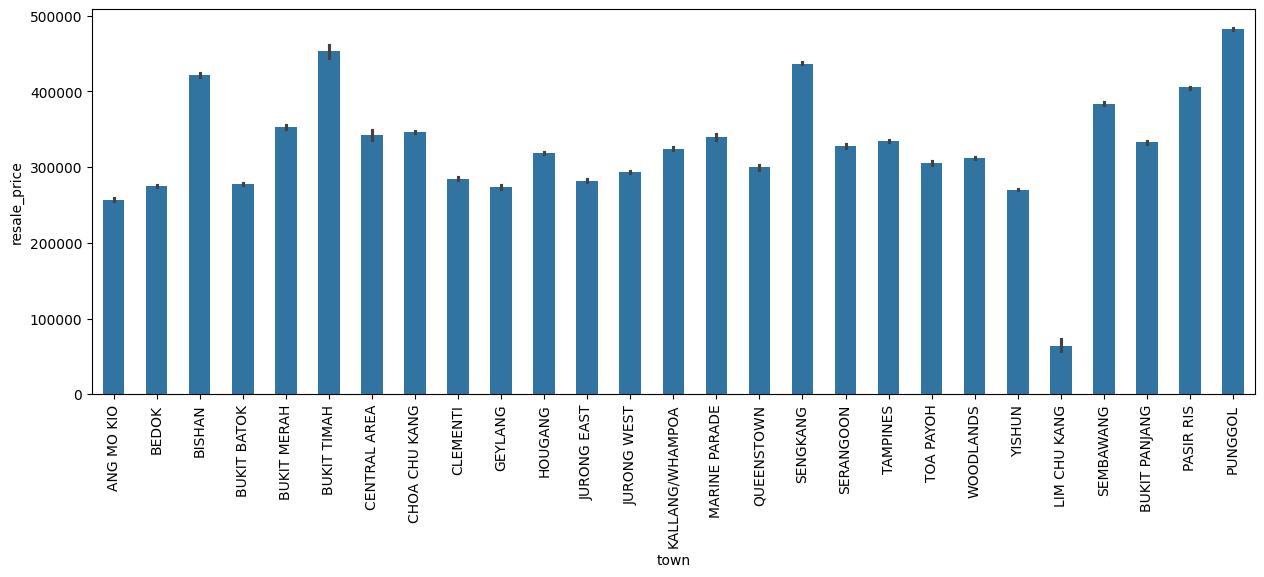

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(x=df1.town,y=df1.resale_price,data=df1,width=0.5)
plt.xticks(rotation=90)

### Towns like Bishan,Bukit Timah,Sengkang,Sembawang,Pasir Ris and Punggol has highest resale value

<Axes: xlabel='flat_type', ylabel='resale_price'>

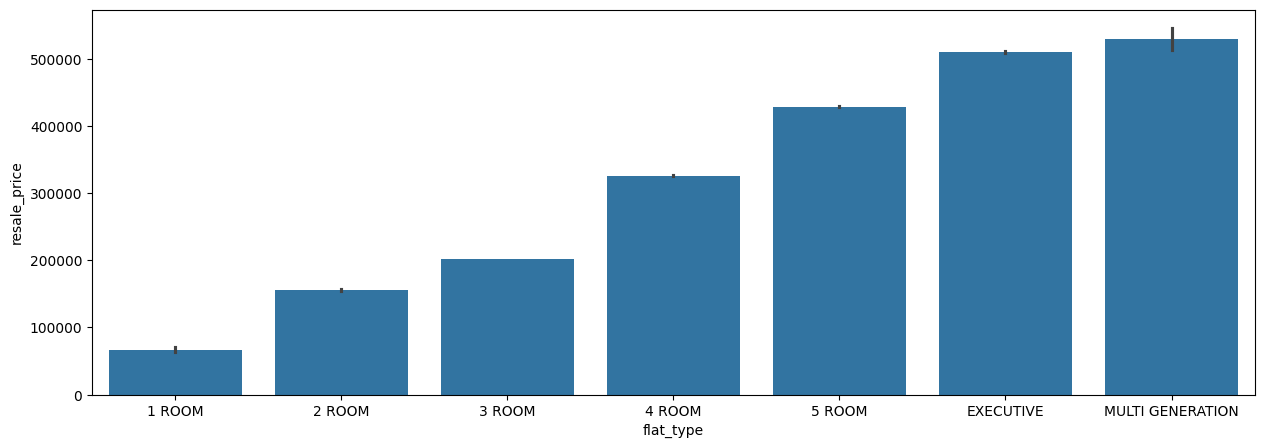

In [28]:
plt.figure(figsize=(15,5))
sns.barplot(x=df1.flat_type,y=df1.resale_price,order=["1 ROOM","2 ROOM","3 ROOM","4 ROOM","5 ROOM","EXECUTIVE","MULTI GENERATION"])

### multi generation has the highest resale value

<Axes: xlabel='year', ylabel='resale_price'>

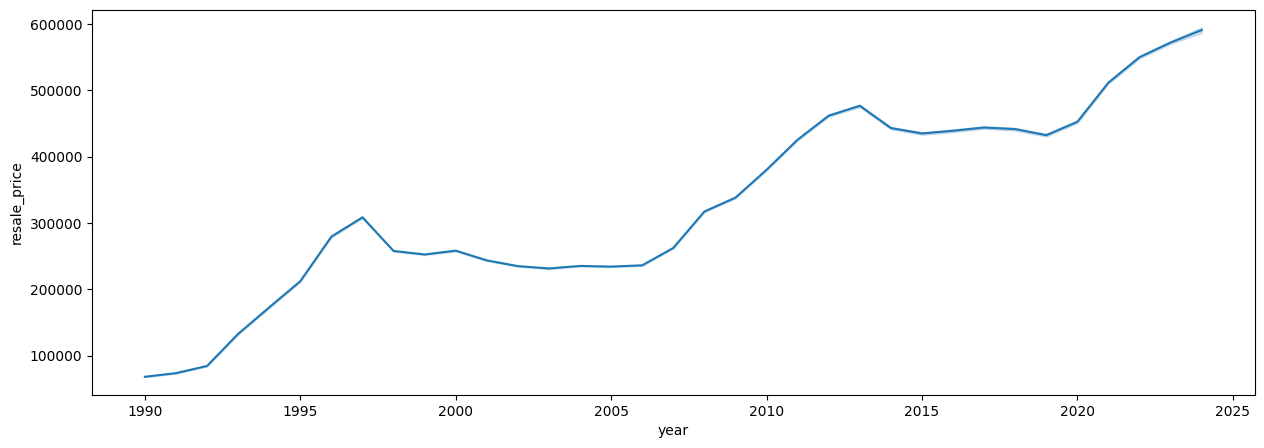

In [29]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df1.year,y=df1.resale_price)

## when the year increases the resale price also increases

<Axes: xlabel='floor_area_sqm'>

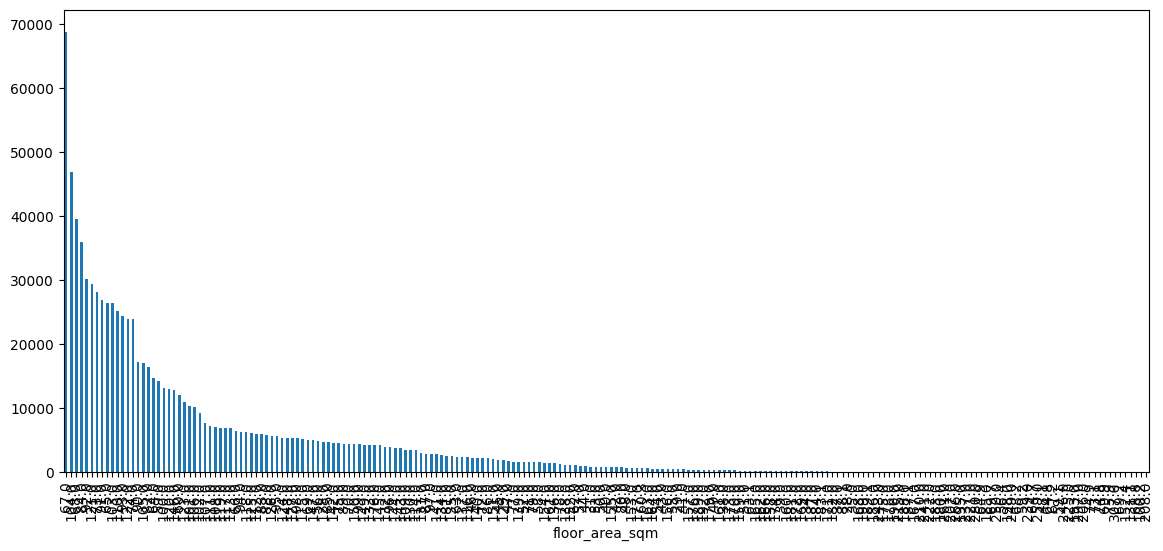

In [30]:
plt.figure(figsize=(14,6))
df1.floor_area_sqm.value_counts().sort_values(ascending=False).plot(kind='bar')

In [31]:
df1.groupby(["floor_area_sqm","resale_price"]).size().sort_values(ascending=False)

floor_area_sqm  resale_price
67.0            47000.0         1345
                160000.0        1153
                150000.0        1072
                155000.0         924
                165000.0         855
                                ... 
241.0           888000.0           1
                958000.0           1
                1235000.0          1
243.0           465000.0           1
                470000.0           1
Length: 97895, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

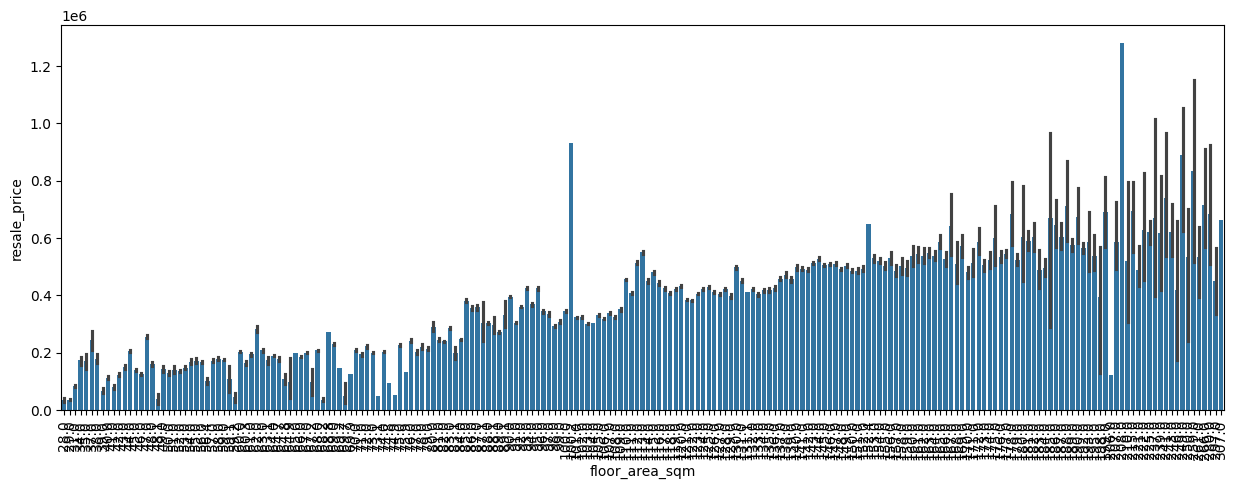

In [32]:
plt.figure(figsize=(15,5))
sns.barplot(x=df1.floor_area_sqm,y=df1.resale_price)
plt.xticks(rotation=90)

In [33]:
df1.year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024], dtype=int32)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, '10 TO 12'),
  Text(1, 0, '04 TO 06'),
  Text(2, 0, '07 TO 09'),
  Text(3, 0, '01 TO 03'),
  Text(4, 0, '13 TO 15'),
  Text(5, 0, '19 TO 21'),
  Text(6, 0, '16 TO 18'),
  Text(7, 0, '25 TO 27'),
  Text(8, 0, '22 TO 24'),
  Text(9, 0, '28 TO 30'),
  Text(10, 0, '31 TO 33'),
  Text(11, 0, '40 TO 42'),
  Text(12, 0, '37 TO 39'),
  Text(13, 0, '34 TO 36'),
  Text(14, 0, '06 TO 10'),
  Text(15, 0, '01 TO 05'),
  Text(16, 0, '11 TO 15'),
  Text(17, 0, '16 TO 20'),
  Text(18, 0, '21 TO 25'),
  Text(19, 0, '26 TO 30'),
  Text(20, 0, '36 TO 40'),
  Text(21, 0, '31 TO 35'),
  Text(22, 0, '46 TO 48'),
  Text(23, 0, '43 TO 45'),
  Text(24, 0, '49 TO 51')])

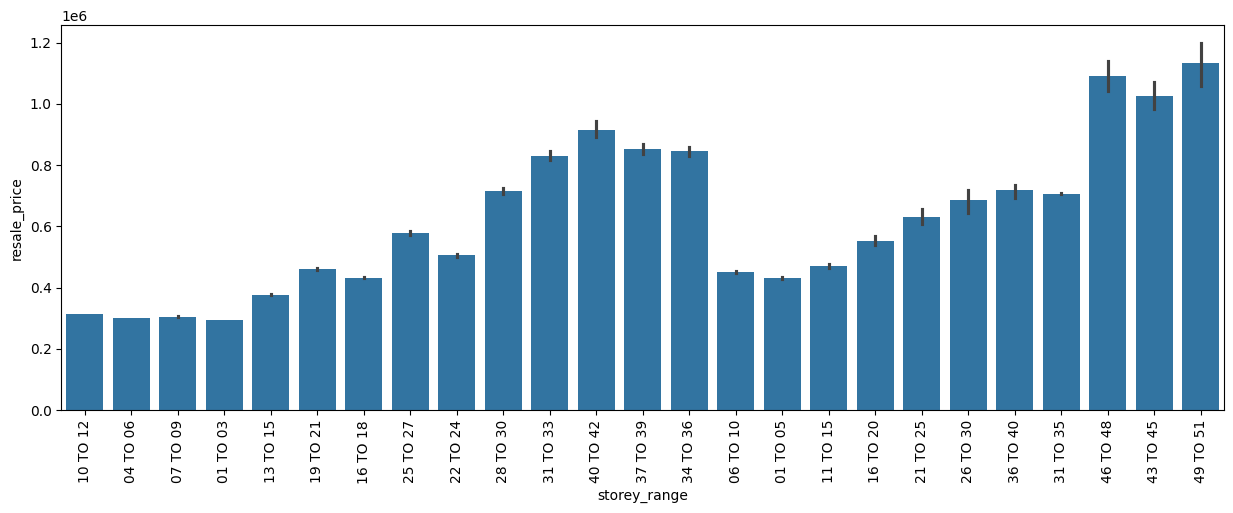

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(x=df1.storey_range,y=df1.resale_price)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55],
 [Text(0, 0, '1966'),
  Text(1, 0, '1967'),
  Text(2, 0, '1968'),
  Text(3, 0, '1969'),
  Text(4, 0, '1970'),
  Text(5, 0, '1971'),
  Text(6, 0, '1972'),
  Text(7, 0, '1973'),
  Text(8, 0, '1974'),
  Text(9, 0, '1975'),
  Text(10, 0, '1976'),
  Text(11, 0, '1977'),
  Text(12, 0, '1978'),
  Text(13, 0, '1979'),
  Text(14, 0, '1980'),
  Text(15, 0, '1981'),
  Text(16, 0, '1982'),
  Text(17, 0, '1983'),
  Text(18, 0, '1984'),
  Text(19, 0, '1985'),
  Text(20, 0, '1986'),
  Text(21, 0, '1987'),
  Text(22, 0, '1988'),
  Text(23, 0, '1989'),
  Text(24, 0, '1990'),
  Text(25, 0, '1991'),
  Text(26, 0, '1992'),
  Text(27, 0, '1993'),
  Text(28, 0, '1994'),
  Text(29, 0, '1

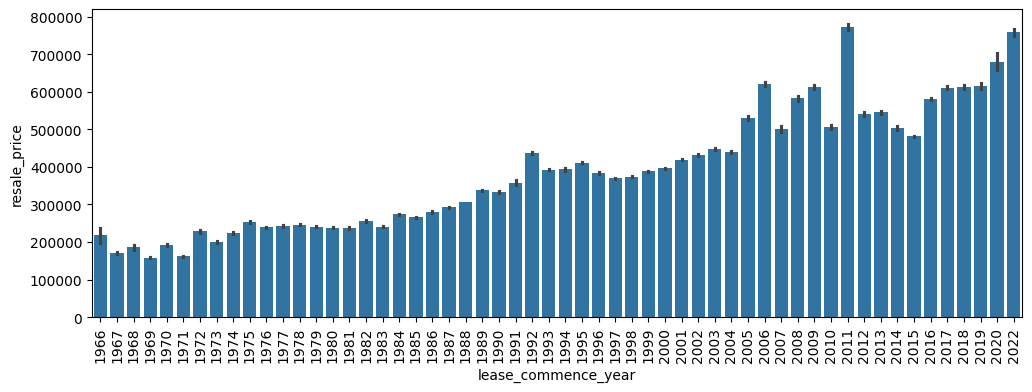

In [35]:
plt.figure(figsize=(12,4))
sns.barplot(x=df1.lease_commence_year,y=df1.resale_price)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Improved'),
  Text(1, 0, 'New Generation'),
  Text(2, 0, 'Model A'),
  Text(3, 0, 'Standard'),
  Text(4, 0, 'Simplified'),
  Text(5, 0, 'Model A-Maisonette'),
  Text(6, 0, 'Apartment'),
  Text(7, 0, 'Maisonette'),
  Text(8, 0, 'Terrace'),
  Text(9, 0, '2-room'),
  Text(10, 0, 'Improved-Maisonette'),
  Text(11, 0, 'Multi Generation'),
  Text(12, 0, 'Premium Apartment'),
  Text(13, 0, 'Adjoined flat'),
  Text(14, 0, 'Premium Maisonette'),
  Text(15, 0, 'Model A2'),
  Text(16, 0, 'DBSS'),
  Text(17, 0, 'Type S1'),
  Text(18, 0, 'Type S2'),
  Text(19, 0, 'Premium Apartment Loft'),
  Text(20, 0, '3Gen')])

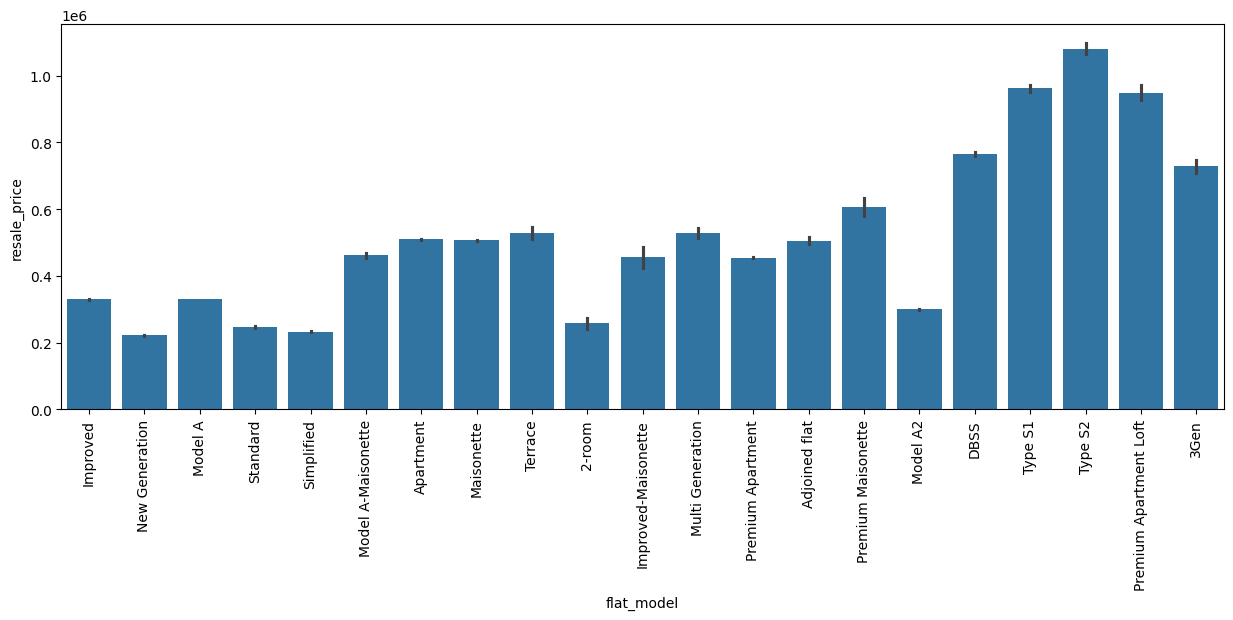

In [36]:
plt.figure(figsize=(15,5))
sns.barplot(x=df1.flat_model,y=df1.resale_price)
plt.xticks(rotation=90)

### type s1 type s2 and premium apartment loft has highest selling value

In [37]:
df2=df1.copy()

In [38]:
category_columns=[col for col in df2.columns if df2[col].dtypes=="object"]
category_columns

['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']

In [39]:
numeric_columns=[col for col in df2.columns if not df2[col].dtypes=="object"]
numeric_columns

['month', 'floor_area_sqm', 'resale_price', 'lease_commence_year', 'year']

In [40]:
df2.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,lease_commence_year,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,9000.0,1977,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,6000.0,1977,1990


In [41]:
# Initialize the LabelEncoders for each category and fit them
from sklearn.preprocessing import LabelEncoder
le_town = LabelEncoder().fit(df2['town'])
le_flat_type = LabelEncoder().fit(df2['flat_type'])
le_storey_range = LabelEncoder().fit(df2['storey_range'])
le_flat_model = LabelEncoder().fit(df2['flat_model'])

# Transform the categorical columns
df2['town'] = le_town.transform(df2['town'])
df2['flat_type'] = le_flat_type.transform(df2['flat_type'])
df2['storey_range'] = le_storey_range.transform(df2['storey_range'])
df2['flat_model'] = le_flat_model.transform(df2['flat_model'])

In [42]:
'''from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df2['town'] = encoder.fit_transform(df2['town'])
df2['flat_type'] = encoder.fit_transform(df2['flat_type'])
df2['storey_range'] = encoder.fit_transform(df2['storey_range'])
df2['flat_model'] = encoder.fit_transform(df2['flat_model'])'''

"from sklearn.preprocessing import LabelEncoder\nencoder = LabelEncoder()\ndf2['town'] = encoder.fit_transform(df2['town'])\ndf2['flat_type'] = encoder.fit_transform(df2['flat_type'])\ndf2['storey_range'] = encoder.fit_transform(df2['storey_range'])\ndf2['flat_model'] = encoder.fit_transform(df2['flat_model'])"

In [43]:
df2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,lease_commence_year,year
0,1,0,0,309,ANG MO KIO AVE 1,5,31.0,5,9000.0,1977,1990
1,1,0,0,309,ANG MO KIO AVE 1,2,31.0,5,6000.0,1977,1990
2,1,0,0,309,ANG MO KIO AVE 1,5,31.0,5,8000.0,1977,1990
3,1,0,0,309,ANG MO KIO AVE 1,4,31.0,5,6000.0,1977,1990
4,1,0,2,216,ANG MO KIO AVE 1,2,73.0,12,47200.0,1976,1990


## resale price and foor area are higher in values so apply log tranformation 

In [44]:
df2["resale_price"]=np.log(df2["resale_price"]+1)
#df2["floor_area_sqm"]=np.log(df2["floor_area_sqm"]+1)

In [45]:
df2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,lease_commence_year,year
0,1,0,0,309,ANG MO KIO AVE 1,5,31.0,5,9.105091,1977,1990
1,1,0,0,309,ANG MO KIO AVE 1,2,31.0,5,8.699681,1977,1990
2,1,0,0,309,ANG MO KIO AVE 1,5,31.0,5,8.987322,1977,1990
3,1,0,0,309,ANG MO KIO AVE 1,4,31.0,5,8.699681,1977,1990
4,1,0,2,216,ANG MO KIO AVE 1,2,73.0,12,10.762170,1976,1990


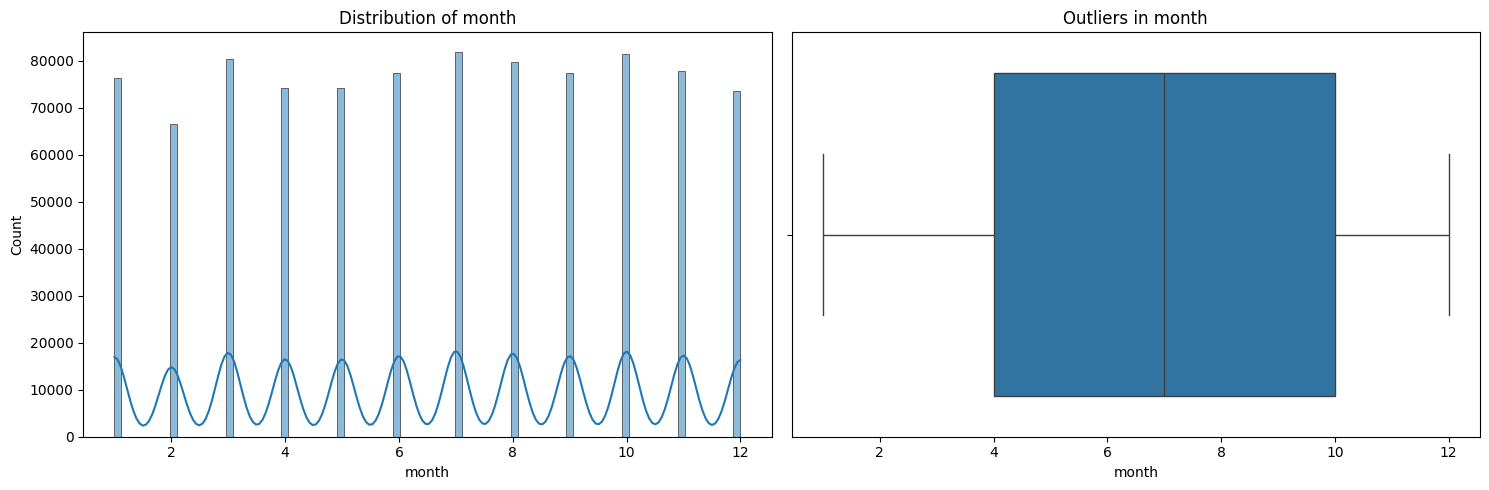

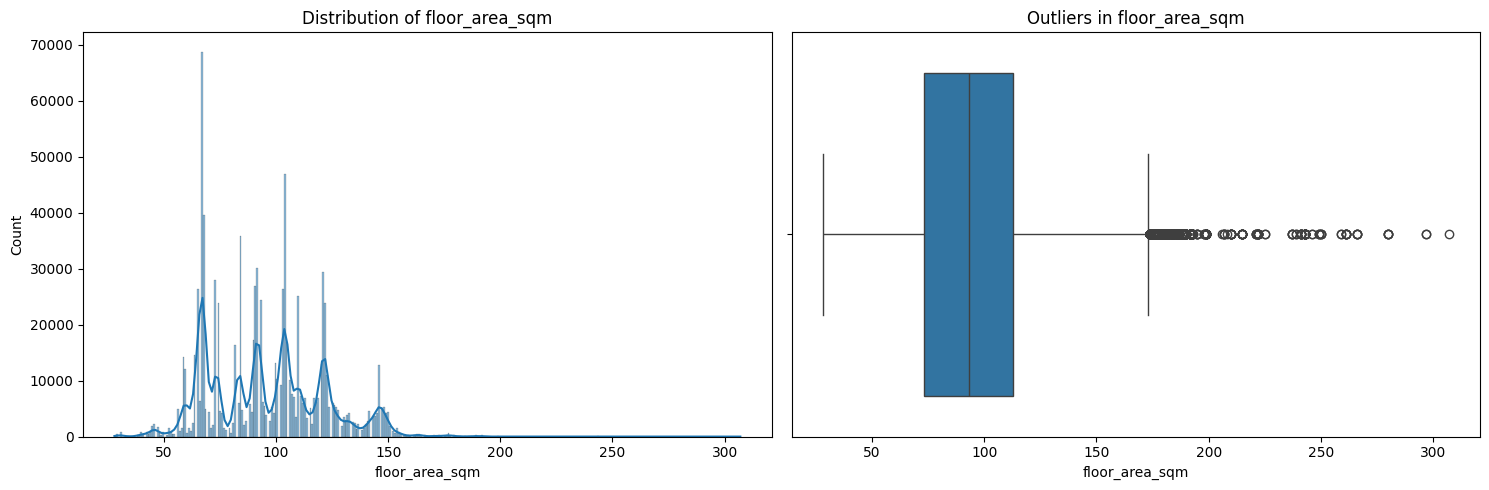

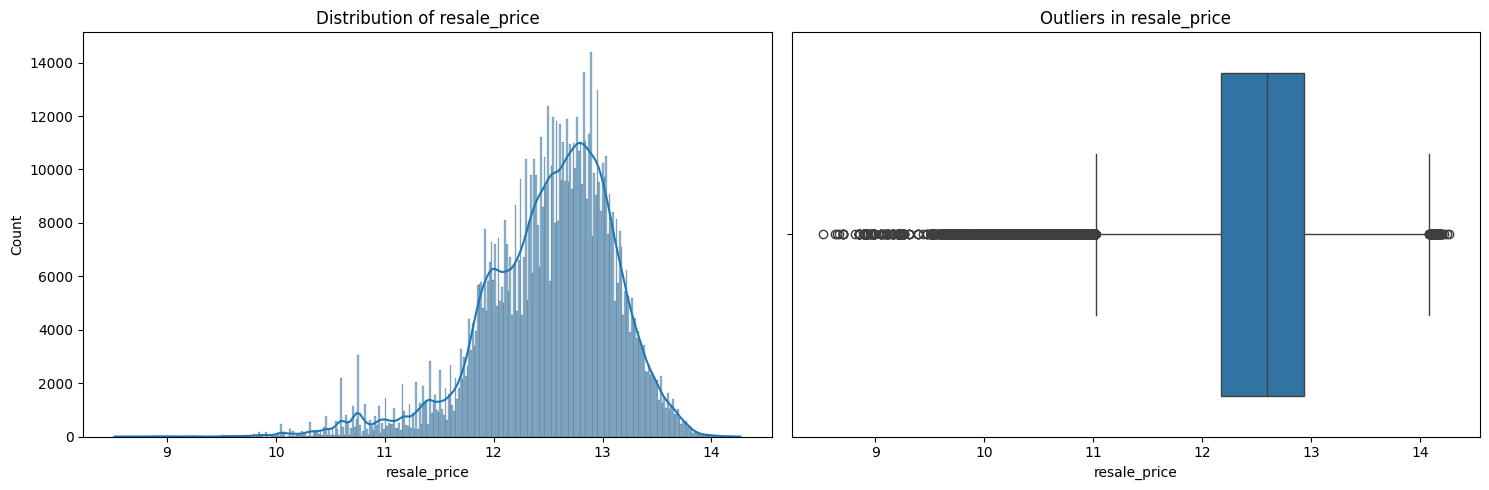

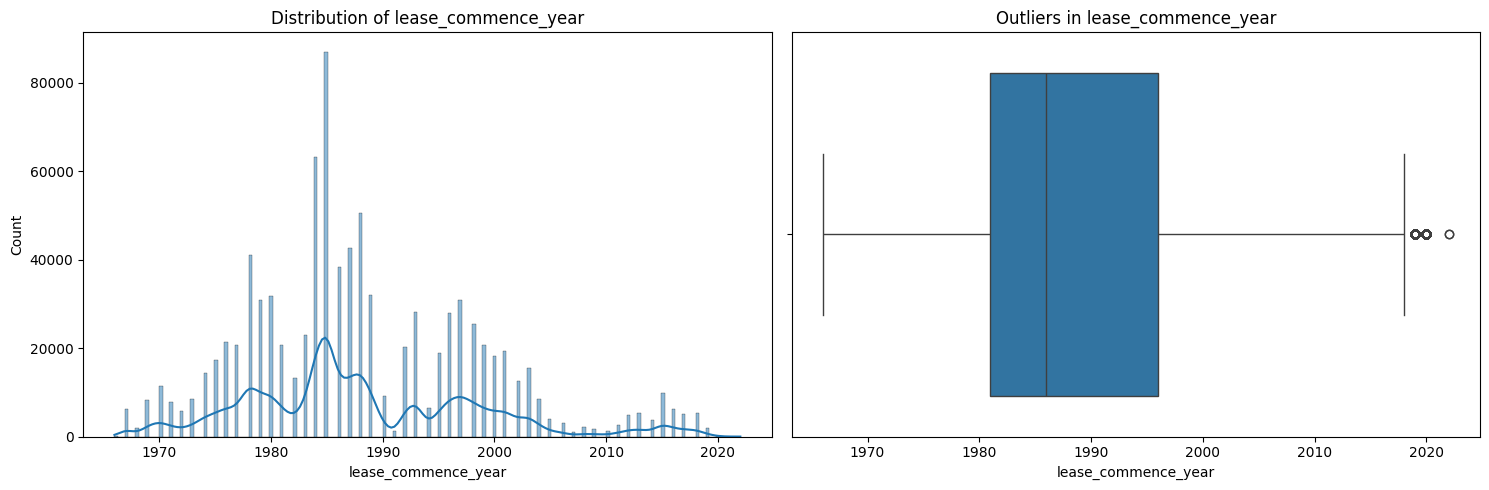

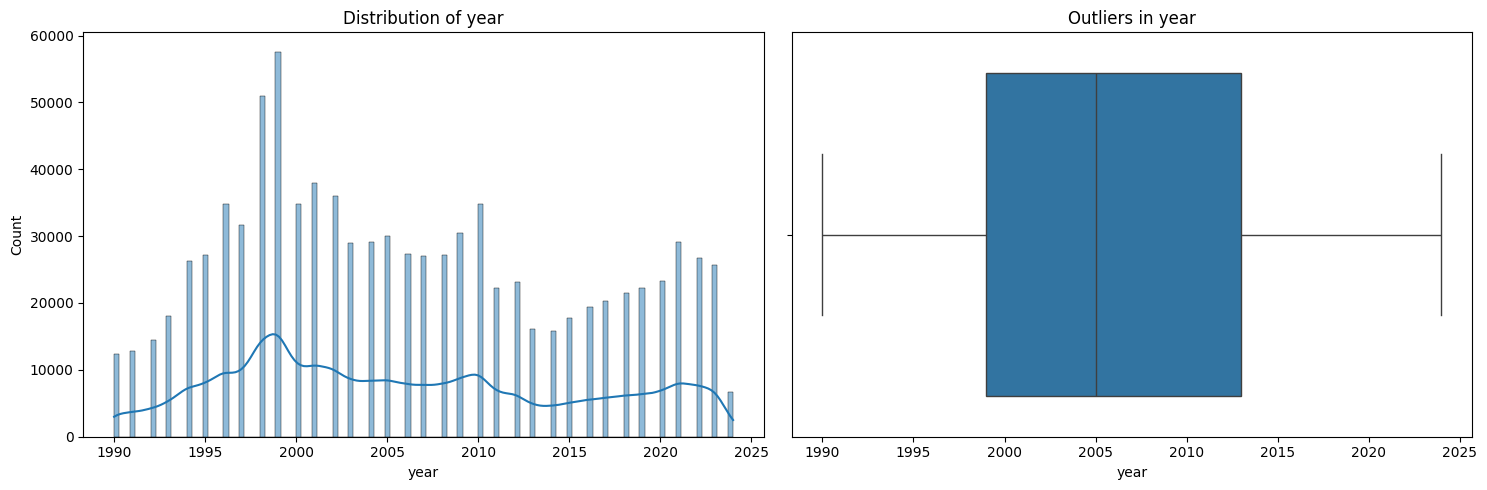

In [46]:
for column in numeric_columns:
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    sns.histplot(df2[column], kde=True, ax=axs[0])
    axs[0].set_title(f"Distribution of {column}")

    sns.boxplot(x=df2[column], ax=axs[1])
    axs[1].set_title(f"Outliers in {column}")

    plt.tight_layout()

## Function to remove outlier

In [47]:
def outliers(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  return lower_bound,upper_bound

## Apply the outliers function to each numerical column

In [48]:
for column in ["resale_price","floor_area_sqm"]:
    if pd.api.types.is_numeric_dtype(df2[column]):
        lower_bound, upper_bound = outliers(df2, column)
        df3 = df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]


In [49]:
df3=df3.drop(['street_name',"block"],axis=1)

In [50]:
X=df3.drop(['resale_price'],axis=1)
y=df3.resale_price

In [51]:
X

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_year,year
0,1,0,0,5,31.0,5,1977,1990
1,1,0,0,2,31.0,5,1977,1990
2,1,0,0,5,31.0,5,1977,1990
3,1,0,0,4,31.0,5,1977,1990
4,1,0,2,2,73.0,12,1976,1990
...,...,...,...,...,...,...,...,...
175835,3,26,5,4,146.0,7,1988,2024
175836,3,26,5,5,142.0,3,1988,2024
175837,3,26,5,5,146.0,7,1988,2024
175838,3,26,5,2,146.0,7,1988,2024


In [52]:
y

0          9.105091
1          8.699681
2          8.987322
3          8.699681
4         10.762170
            ...    
175835    13.629182
175836    13.610945
175837    13.617061
175838    13.664689
175839    13.567050
Name: resale_price, Length: 917755, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

linear_regression = LinearRegression()
linear_regression.fit(X_train , y_train)
y_pred = linear_regression.predict(X_test)
score=cross_val_score (linear_regression,X,y,cv=5)


print(f'MAE = {metrics.mean_absolute_error(y_test,y_pred)}')
print(f'MSE = {metrics.mean_squared_error(y_test,y_pred)}')
print(f'RMSE  = {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')
print("cross_validation_score :",np.mean(score))
print(f'R2 Score test = {linear_regression.score(X_test,y_test)}')
print(f'R2 Score train = {linear_regression.score(X_train,y_train)}')

MAE = 0.22384841143942802
MSE = 0.08885979525124825
RMSE  = 0.2980936014933032
cross_validation_score : 0.35665706387495866
R2 Score test = 0.7601212762380856
R2 Score train = 0.7613528098949885


In [55]:
y_pred

array([12.78616623, 11.7733448 , 12.09911225, ..., 11.6260649 ,
       11.99200074, 13.07567205])

In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics

decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train)
y_pred = decision_tree_regressor.predict(X_test)
score=cross_val_score (decision_tree_regressor,X,y,cv=5)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE is - {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print("cross_validation_score :",np.mean(score))
print(f'R2 Score for test is - {decision_tree_regressor.score(X_test, y_test)}')
print(f'R2 Score for train is - {decision_tree_regressor.score(X_train, y_train)}')

MAE is - 0.07361203893475497
MSE is - 0.01164915700329095
RMSE is - 0.107931260547123
cross_validation_score : 0.5259056427257728
R2 Score for test is - 0.9685528769568896
R2 Score for train is - 0.9977148588708593


In [57]:
y_pred

array([13.26212706, 11.4616427 , 11.94463004, ..., 10.64544871,
       12.01370681, 13.24847904])

#saving the decisiontree model

In [58]:
#Saving the model
import pickle
with open ('pickle files/model.pkl', 'wb') as f:
    pickle.dump(decision_tree_regressor , f)

In [59]:
with open ("pickle files/model.pkl" ,'rb') as f:
    model=pickle.load(f)

In [60]:
import pickle
with open("pickle files/le_town.pkl","wb")as f:
    pickle.dump(le_town, f)
with open("pickle files/le_flat_type.pkl","wb")as f:
    pickle.dump(le_flat_type, f)
with open("pickle files/le_storey_range.pkl","wb")as f:
    pickle.dump(le_storey_range, f)
with open("pickle files/le_flat_model.pkl","wb")as f:
    pickle.dump(le_flat_model, f)

In [61]:
# Taking user inputs and encoding them
month = float(1)
town = float(le_town.transform(["ANG MO KIO"]))
flat_type = float(le_flat_type.transform(["3 ROOM"]))
storey_range = float(le_storey_range.transform(["07 TO 09"]))
foor_area_sqm = float(68)
flat_model = float(le_flat_model.transform(["New Generation"]))
lease_commence_year = float(1970)
year = float(1990)

# Creating the feature array
features = np.array([[month, town, flat_type, storey_range, foor_area_sqm, flat_model, lease_commence_year, year]])

# Making the prediction
prediction = model.predict(features)
print("Predicted resale price is :", np.exp(prediction))


Predicted resale price is : [42001.]


In [62]:
df1.iloc[100]

month                                 1
town                         ANG MO KIO
flat_type                        3 ROOM
block                               152
street_name            ANG MO KIO AVE 5
storey_range                   07 TO 09
floor_area_sqm                     68.0
flat_model               New Generation
resale_price                    52500.0
lease_commence_year                1981
year                               1990
Name: 100, dtype: object